In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as gos
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Power Transforms**

Data transforms are intended to remove noise and improve the signal in time series forecasting. It can be very difficult to select a good, or even best, transform for a given prediction problem. There are many transforms to choose from and each has a different mathematical intuition.

**Using Airline Passengers Dataset as an example**

Text(0.5, 1.0, 'Histogram plot of the Airline Passengers dataset.')

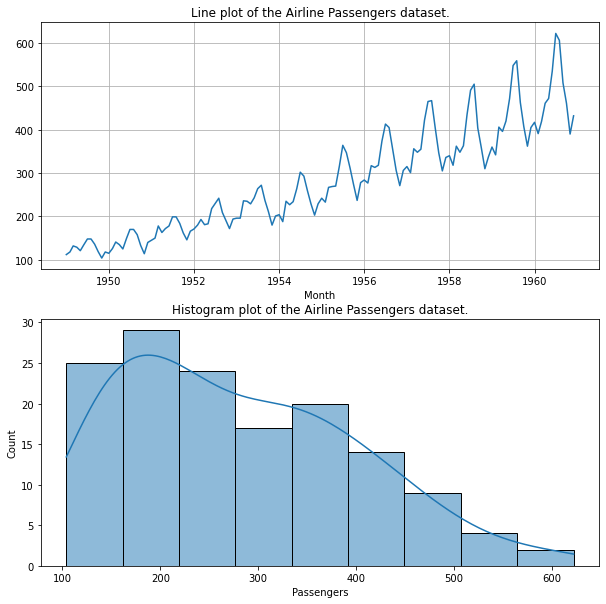

In [31]:
series = pd.read_csv("airline-passengers.csv",header=0,index_col=0,
parse_dates=True, squeeze=True)

fig, ax = plt.subplots(2,1, figsize=(10,10))
sns.lineplot(data=series,x=series.index,y=series.values, ax=ax[0])
sns.histplot(data=series, ax=ax[1],kde=True)
ax[0].grid(True)
ax[0].set_title("Line plot of the Airline Passengers dataset.")
ax[1].set_title("Histogram plot of the Airline Passengers dataset.")

The dataset is non-stationary, meaning that the mean and the variance of the observations change over time. This makes it difficult to model by both classical statistical methods, like ARIMA, and more sophisticated machine learning methods, like neural networks. This is caused by what appears to be both an increasing trend and a seasonality component. 

In addition, the amount of change, or the variance, is increasing with time. This is clear when you look at the size of the seasonal component and notice that from one cycle to the next, the amplitude (from bottom to top of the cycle) is increasing.

**Square Root Transform**

A time series that has a quadratic growth trend can be made linear by taking the square root.

- Consider a series of the numbers 1 to 99 squared. The line plot of this series will show a quadratic growth trend and a histogram of the values will show an exponential distribution with a long tail.

Text(0.5, 1.0, 'Histogram plot of the numbers 1 to 99 squared.')

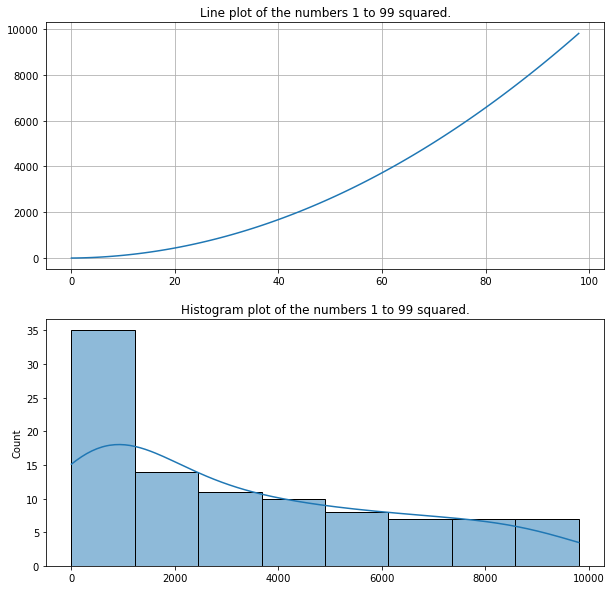

In [32]:
# Code Snippet
squares = [i**2 for i in range(1,100)]
fig, ax = plt.subplots(2,1, figsize=(10,10))
sns.lineplot(data=squares, ax=ax[0])
sns.histplot(data=squares, ax=ax[1],kde=True)
ax[0].grid(True)
ax[0].set_title("Line plot of the numbers 1 to 99 squared.")
ax[1].set_title("Histogram plot of the numbers 1 to 99 squared.")

In [33]:
# squares

In [34]:
# for a in range(0,len(squares)):
#     print(squares[a])

Text(0.5, 1.0, 'Histogram plot of the numbers 1 to 99 square-root.')

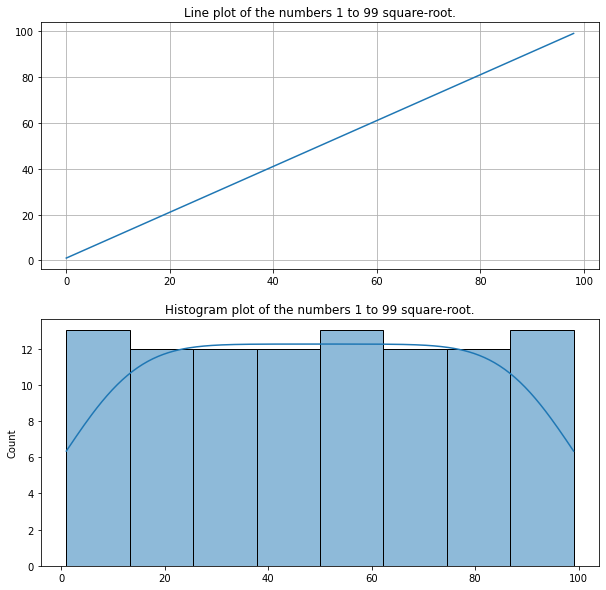

In [35]:
# Taking the square root of the quadratic series
from math import sqrt

transform = [int(sqrt(squares[a])) for a in range(0,len(squares))]
fig, ax = plt.subplots(2,1, figsize=(10,10))
sns.lineplot(data=transform, ax=ax[0])
sns.histplot(data=transform, ax=ax[1],kde=True)
ax[0].grid(True)
ax[0].set_title("Line plot of the numbers 1 to 99 square-root.")
ax[1].set_title("Histogram plot of the numbers 1 to 99 square-root.")

Text(0.5, 0.98, 'Square Root Transform Example')

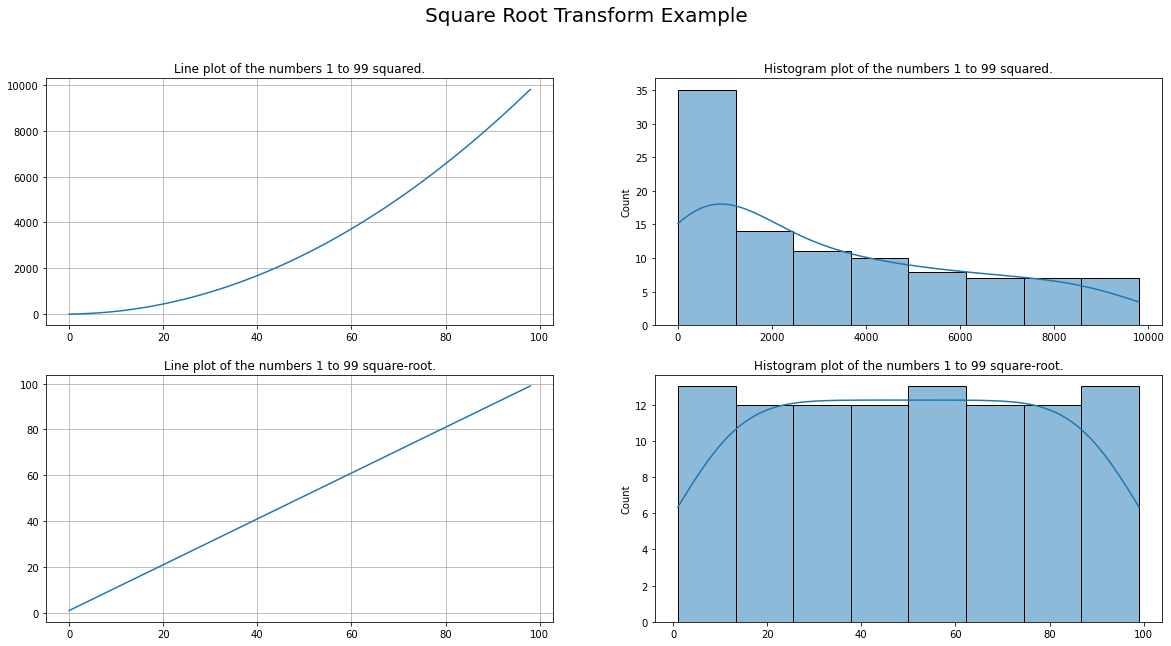

In [36]:
# Code Snippet

from math import sqrt
# Plot settings
fig, ax = plt.subplots(2,2, figsize=(20,10))

squares = [i**2 for i in range(1,100)]
sns.lineplot(data=squares, ax=ax[0,0])
sns.histplot(data=squares, ax=ax[0,1],kde=True)
ax[0,0].grid(True)
ax[0,0].set_title("Line plot of the numbers 1 to 99 squared.")
ax[0,1].set_title("Histogram plot of the numbers 1 to 99 squared.")

# Taking the square root of the quadratic series
transform = [int(sqrt(squares[a])) for a in range(0,len(squares))]
sns.lineplot(data=transform, ax=ax[1,0])
sns.histplot(data=transform, ax=ax[1,1],kde=True)
ax[1,0].grid(True)
ax[1,0].set_title("Line plot of the numbers 1 to 99 square-root.")
ax[1,1].set_title("Histogram plot of the numbers 1 to 99 square-root.")
fig.suptitle("Square Root Transform Example",fontsize=20)


In [37]:
# Applying same approach to the dataset at hand as an example
dataframe = pd.DataFrame(series.values)
dataframe.head()

,0
0,112
1,118
2,132
3,129
4,121


In [38]:
dataframe.columns = ['passengers']
dataframe.head()
dataframe.passengers = np.sqrt(dataframe.passengers)

In [39]:
print(f"Skewness: {dataframe.skew()}")

Skewness: passengers    0.222439
dtype: float64


Text(0.5, 1.0, 'Histogram plot of the Airplane Passengers square-root.')

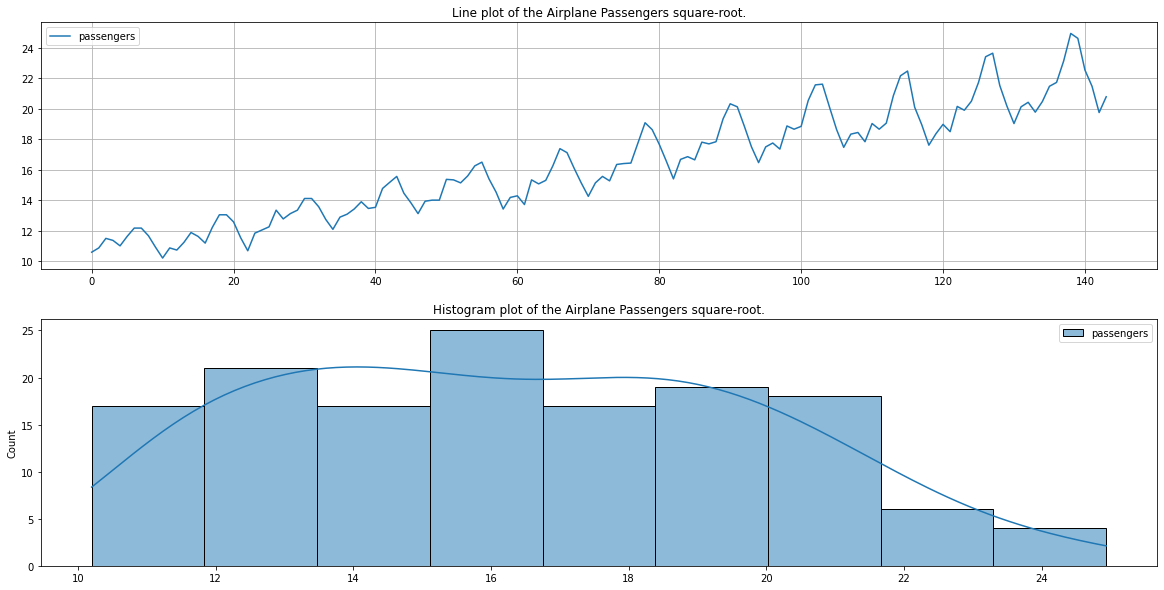

In [40]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
sns.lineplot(data=dataframe,ax=ax[0])
sns.histplot(data=dataframe, ax=ax[1],kde=True)
ax[0].grid(True)
ax[0].set_title("Line plot of the Airplane Passengers square-root.")
ax[1].set_title("Histogram plot of the Airplane Passengers square-root.")

**Log Transform**

A class of more extreme trends are exponential, often graphed as a hockey stick. Time series with an exponential distribution can be made linear by taking the logarithm of the values. This is called a log transform. As with the square and square root case above, we can demonstrate this with a quick example.

In [41]:
# Code Snippet

from math import exp

exponentials = [exp(i) for i in range(1,100)]
len(exponentials)

99

Text(0.5, 0.98, 'Log Transform Example')

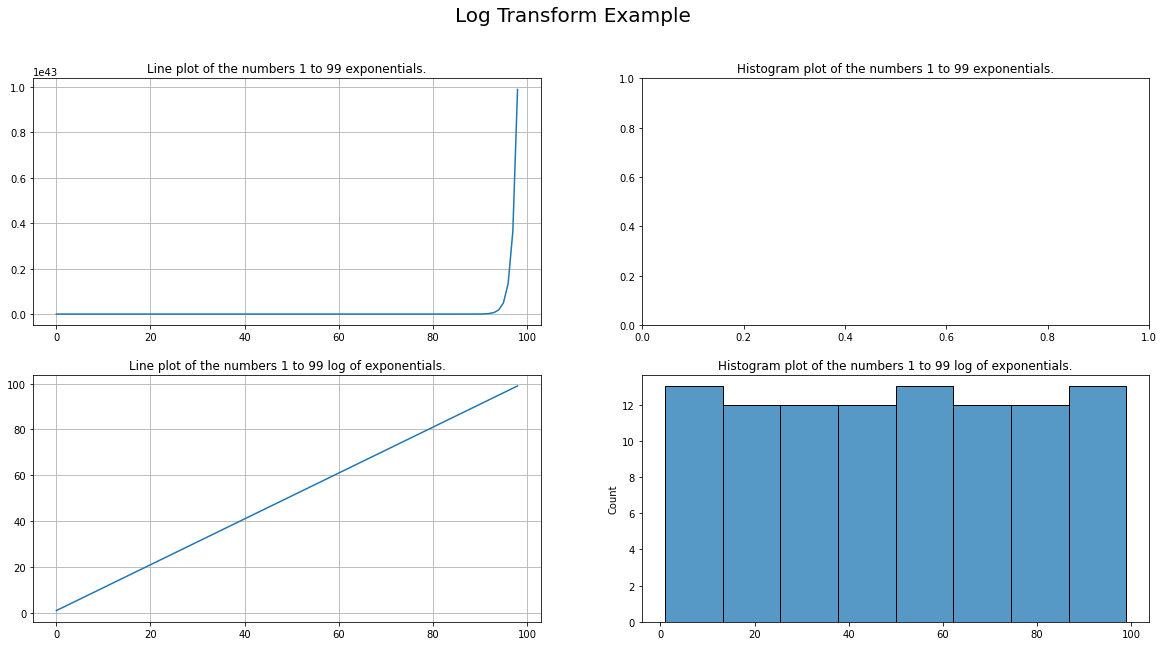

In [42]:
# Code Snippet

from math import exp

# Plot settings
fig, ax = plt.subplots(2,2, figsize=(20,10))

exponentials = [exp(i) for i in range(1,100)]


sns.lineplot(data=exponentials, ax=ax[0,0])

# Memory error
# MemoryError: Unable to allocate 667. GiB for an array
#  with shape (89584211388,) and data type float64
# sns.histplot(data=exponentials[:100], ax=ax[0,1]) 

ax[0,0].grid(True)
ax[0,0].set_title("Line plot of the numbers 1 to 99 exponentials.")
ax[0,1].set_title("Histogram plot of the numbers 1 to 99 exponentials.")

# Taking the square root of the quadratic series
transform = [np.log(exponentials[a]) for a in range(0,len(exponentials))]
sns.lineplot(data=transform, ax=ax[1,0])
sns.histplot(data=transform, ax=ax[1,1])
ax[1,0].grid(True)
ax[1,0].set_title("Line plot of the numbers 1 to 99 log of exponentials.")
ax[1,1].set_title("Histogram plot of the numbers 1 to 99 log of exponentials.")
fig.suptitle("Log Transform Example",fontsize=20)


In [43]:
## Use this to visualise the exponential 
# plt.hist(exponentials) 

In [44]:
# Applying same approach to the dataset at hand as an example
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe.passengers = np.log(dataframe.passengers)
dataframe.head()

,passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791


Text(0.5, 1.0, 'Histogram plot of the Airplane Passengers Log.')

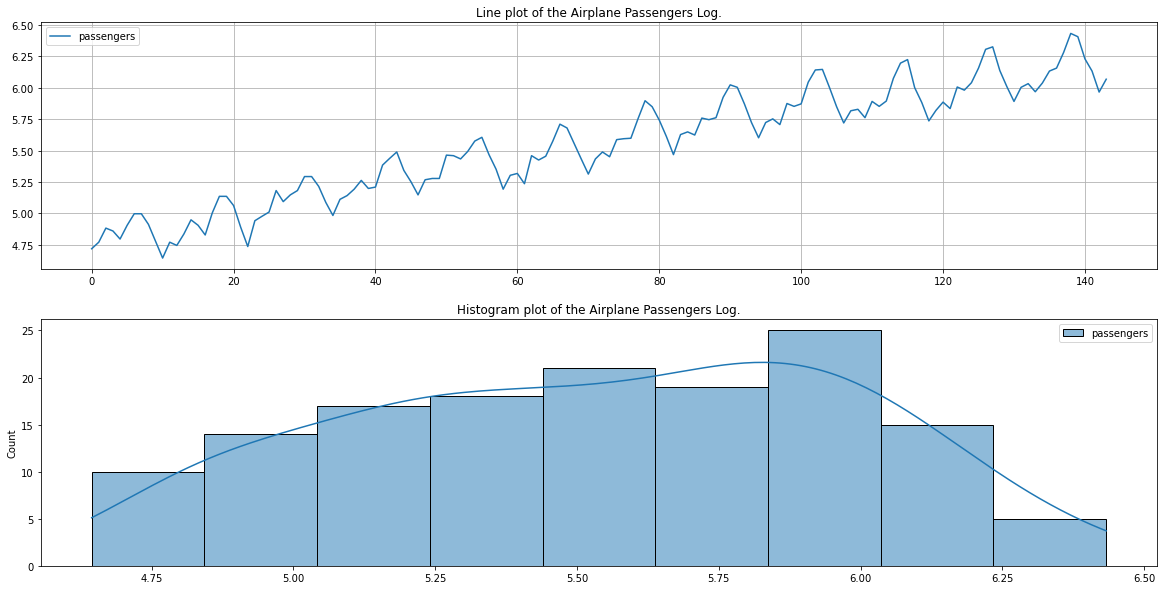

In [45]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
sns.lineplot(data=dataframe,ax=ax[0])
sns.histplot(data=dataframe, ax=ax[1],kde=True)
ax[0].grid(True)
ax[0].set_title("Line plot of the Airplane Passengers Log.")
ax[1].set_title("Histogram plot of the Airplane Passengers Log.")

In [46]:
print(f"Skewness: {dataframe.skew()}")

Skewness: passengers   -0.122001
dtype: float64


**Box-Cox Transform**

The square root transform and log transform belong to a class of transforms called power transforms. The Box-Cox transform is a configurable data transform method that supports both square root and log transform, as well as a suite of related transforms.

More than that, it can be configured to evaluate a suite of transforms automatically and select a best fit. It can be thought of as a power tool to iron out power-based change in your time series. The resulting series may be more linear and the resulting distribution more Gaussian or Uniform, depending on the underlying process that generated it. The scipy.stats library provides an implementation of the Box-Cox transform. The boxcox() function takes an argument, called lambda, that controls the type of transform to perform. Below are some common values for lambda:

- lambda = -1.0 is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

In [49]:
# Importing the boxcox
from scipy.stats import boxcox

dataframe = pd.DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe.passengers = boxcox(dataframe.passengers,lmbda=0.0)
dataframe.head()

,passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791


Text(0.5, 1.0, 'Histogram plot of the Airplane Passengers boxcox.')

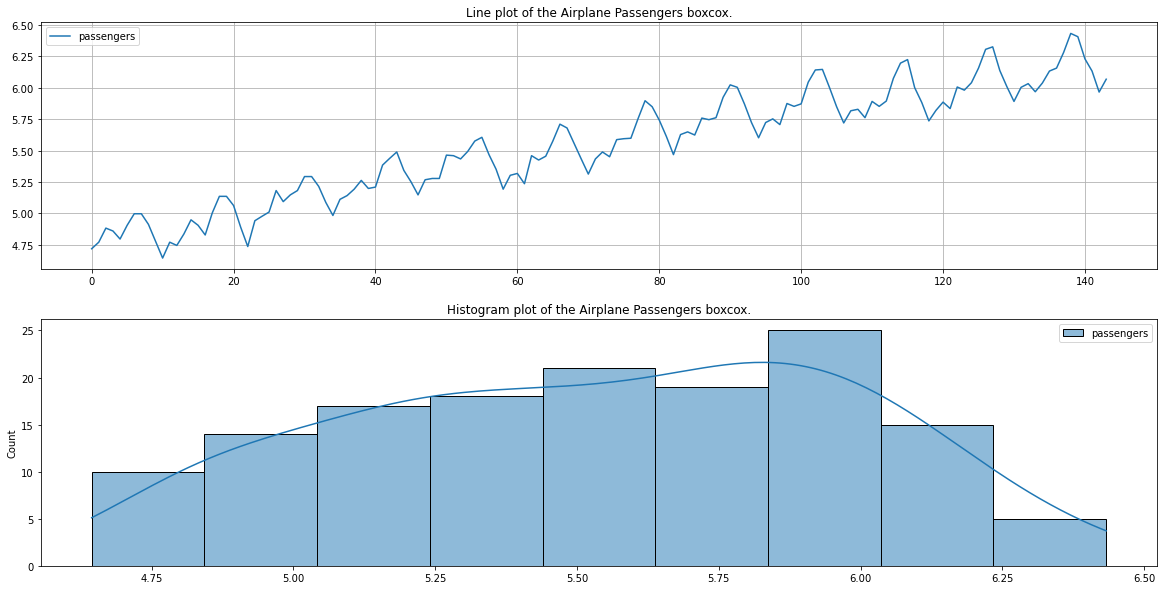

In [50]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
sns.lineplot(data=dataframe,ax=ax[0])
sns.histplot(data=dataframe, ax=ax[1],kde=True)
ax[0].grid(True)
ax[0].set_title("Line plot of the Airplane Passengers boxcox.")
ax[1].set_title("Histogram plot of the Airplane Passengers boxcox.")

We can set the lambda parameter to None (the default) and let the function nd a statistically tuned value. The following example demonstrates this usage, returning both the transformed dataset and the chosen lambda value.

In [54]:
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe.passengers, lmbda = boxcox(dataframe.passengers)
dataframe.head()

,passengers
0,6.827490
1,6.932822
2,7.161892
3,7.114611
4,6.983787


In [53]:
print(f"Value of lmbda: {lmbda}")

Value of lmbda: 0.14802265137037945


Text(0.5, 1.0, 'Histogram plot of the Airplane Passengers auto-boxcox.')

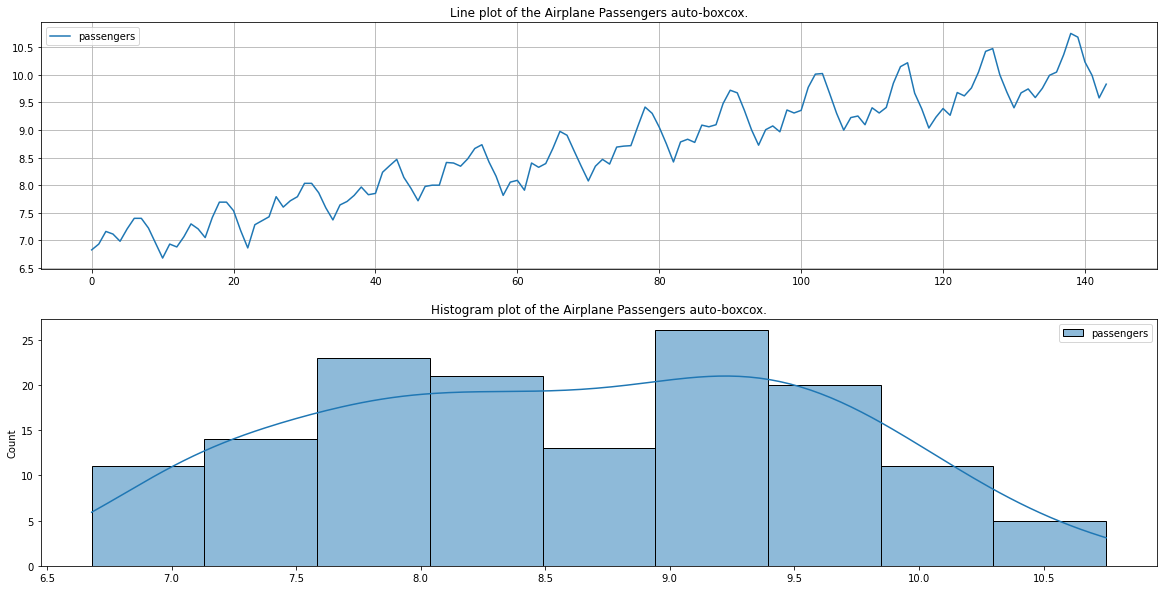

In [56]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
sns.lineplot(data=dataframe,ax=ax[0])
sns.histplot(data=dataframe, ax=ax[1],kde=True)
ax[0].grid(True)
ax[0].set_title("Line plot of the Airplane Passengers auto-boxcox.")
ax[1].set_title("Histogram plot of the Airplane Passengers auto-boxcox.")